In [7]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [8]:
from sympy import init_printing
init_printing()

In [9]:
x = sympy.symbols('x')

In [10]:
x

In [11]:
5*x

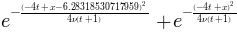

In [12]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*np.pi)**2/(4*nu*(t+1)))
phi

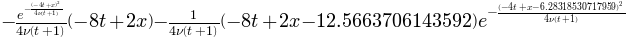

In [13]:
phiprime = phi.diff(x)
phiprime

In [14]:
#Unrendered version
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [15]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [16]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x-4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x-4, nu=3 is 3.4917066420644494.


In [17]:
###variable declarations
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
nu = 0.07
sigma = .1
dt = sigma*dx**2/nu

x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
t = 0

In [18]:
u = np.asarray([u_lamb(t, x0, nu) for x0 in x])
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

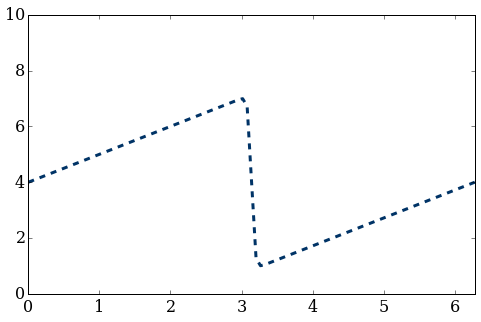

In [19]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x,u, color='#003366', ls='--', lw=3)
plt.xlim([0,2*np.pi])
plt.ylim([0,10]);

fig - Saw tooth function

## Periodic Boundary Conditions

In [20]:
for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                                    (un[2:] - 2*un[1:-1] + un[:-2])
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                        (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
            (un[0] - 2*un[-1] + un[-2])
        
    u_analytical = np.asarray([u_lamb(nt*dt, xi, nu) for xi in x])

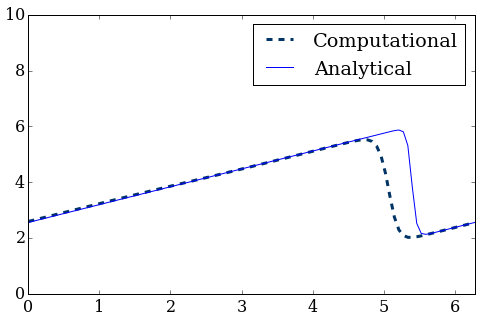

In [21]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x,u, color='#003366', ls='--', lw=3, label='Computational')
plt.plot(x,u_analytical, label='Analytical')
plt.xlim([0,2*np.pi])
plt.ylim([0,10])
plt.legend();

In [23]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [24]:
u = np.asarray([u_lamb(t, x0, nu) for x0 in x])


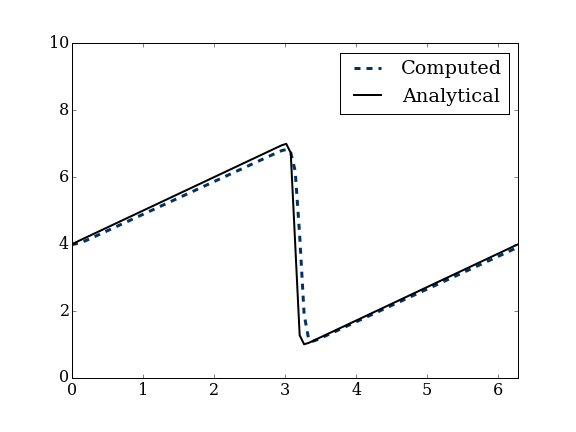
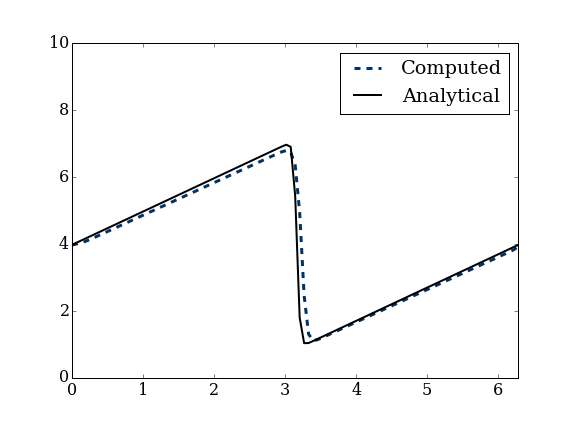
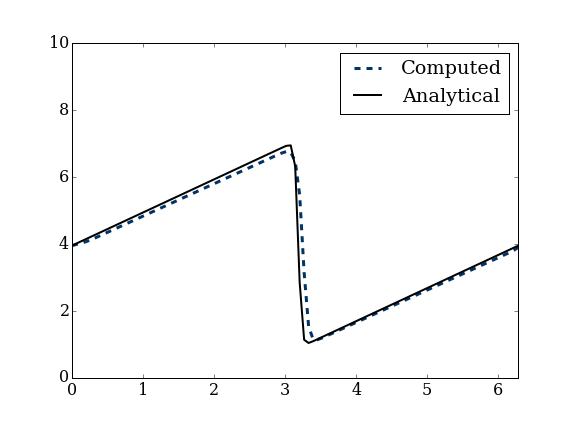
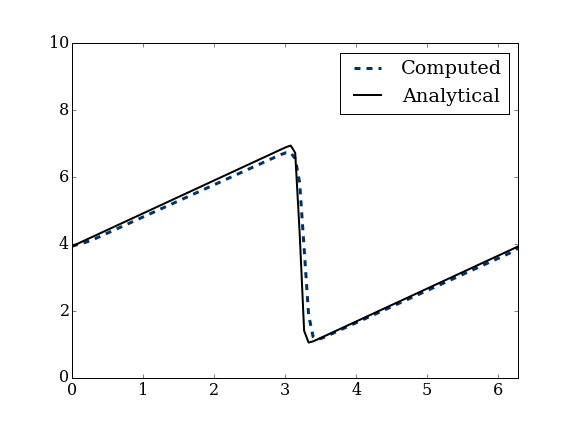
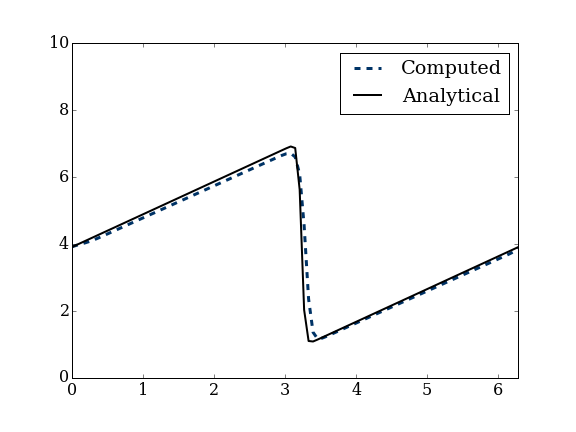
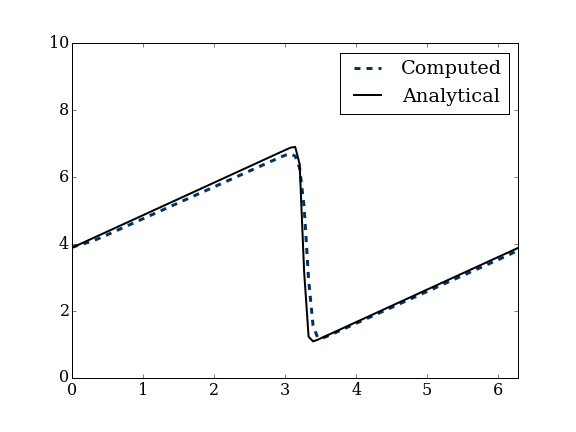
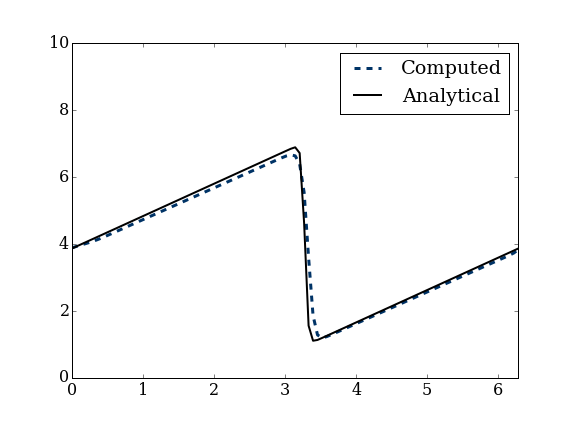
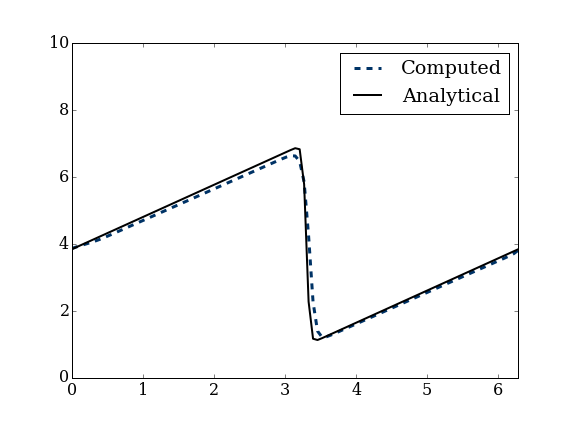
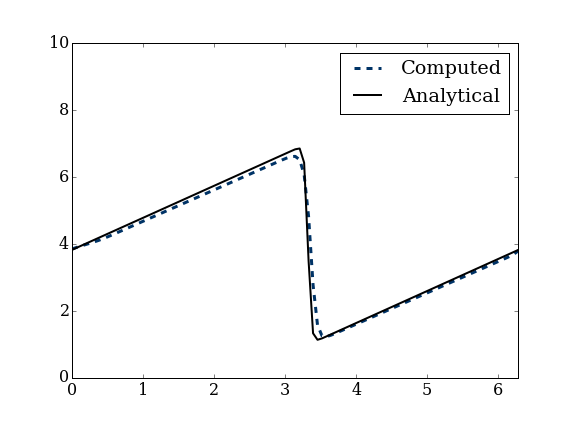
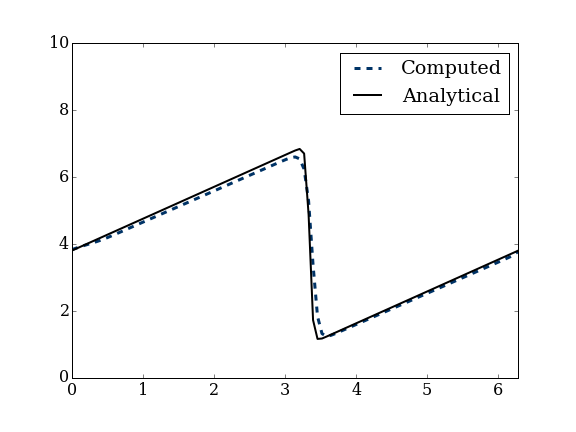
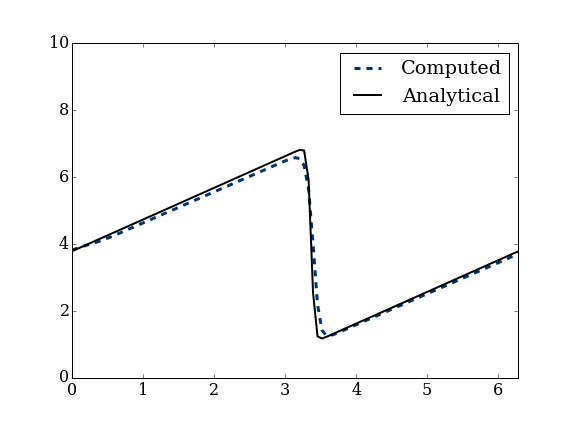
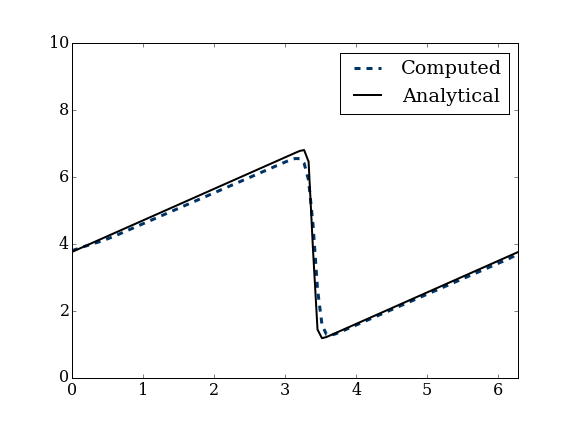
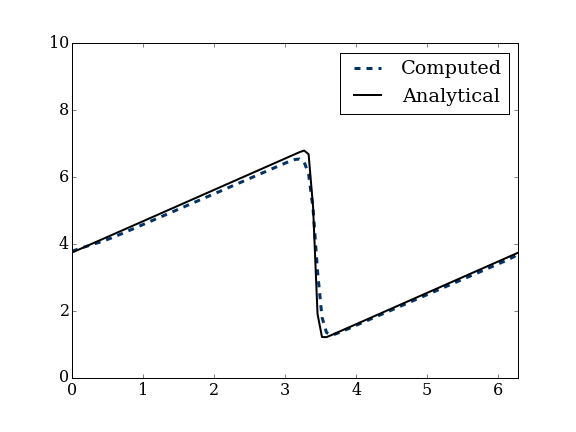
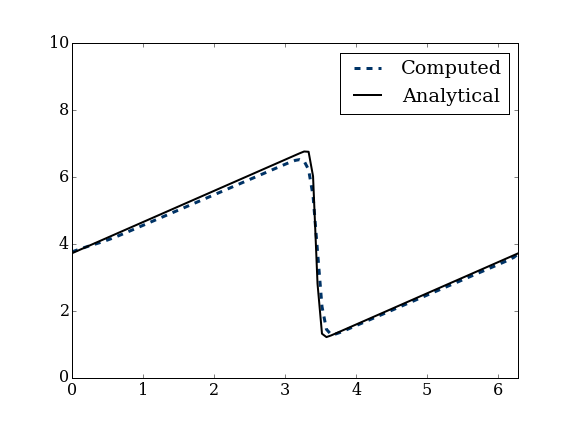
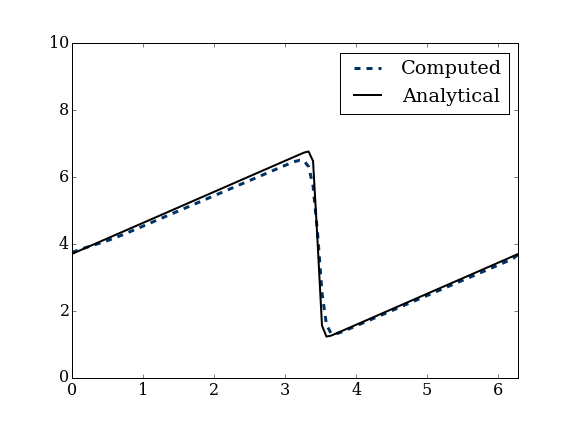
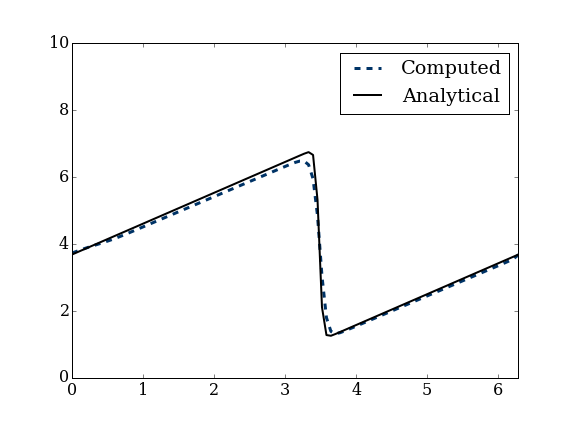
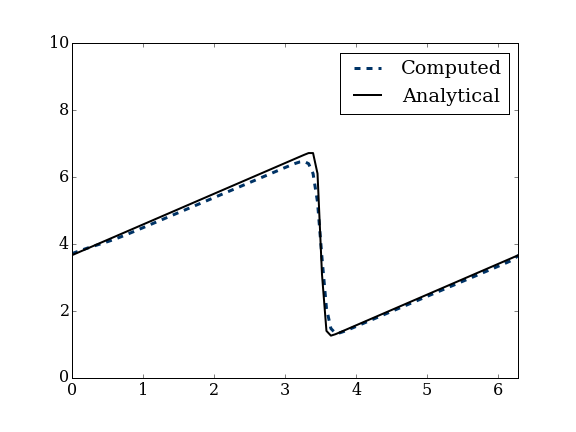
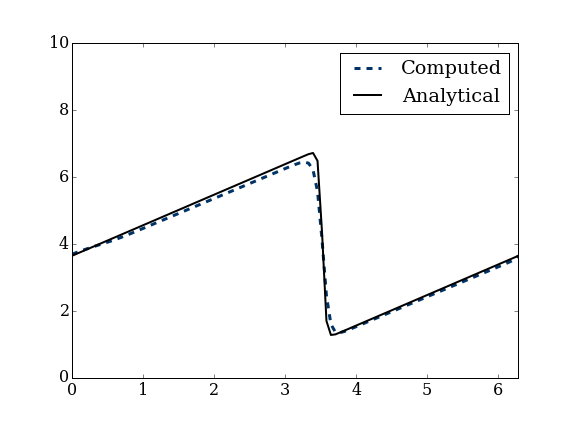
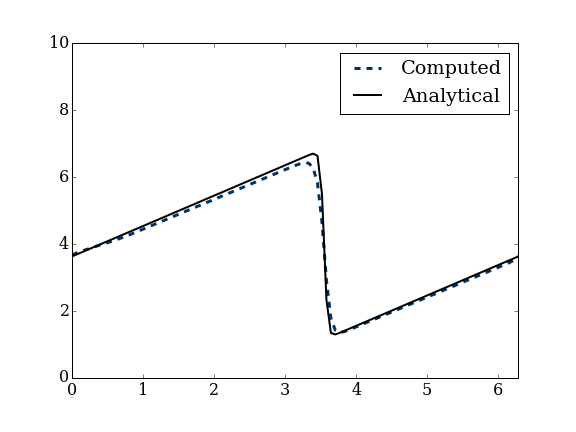
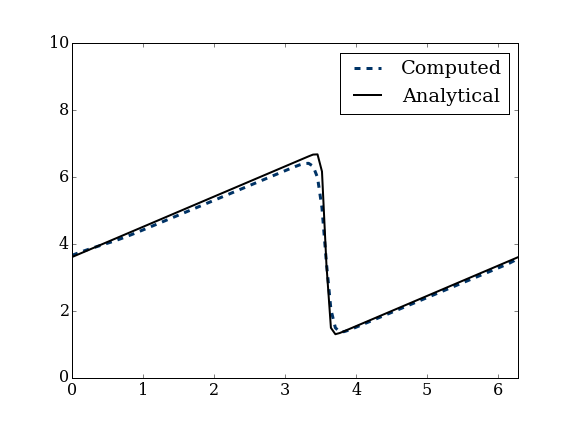
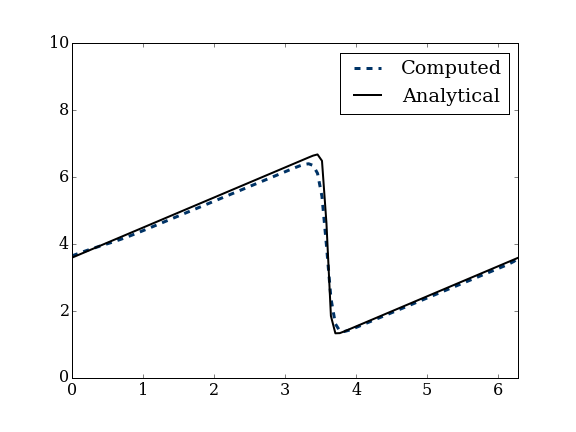
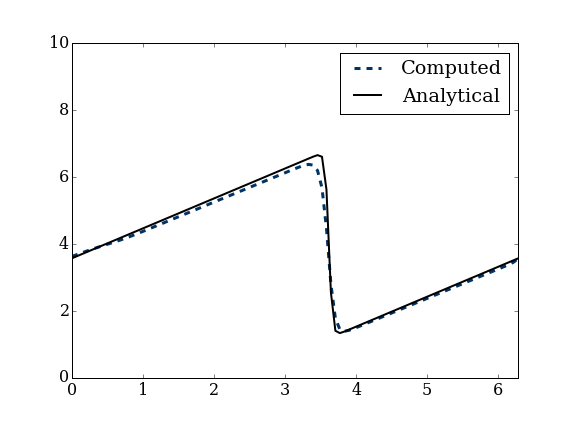
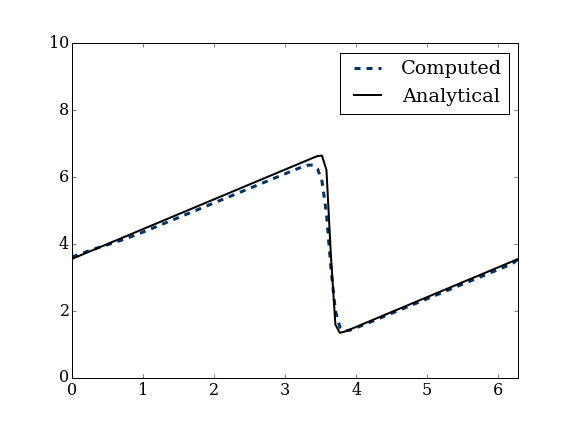
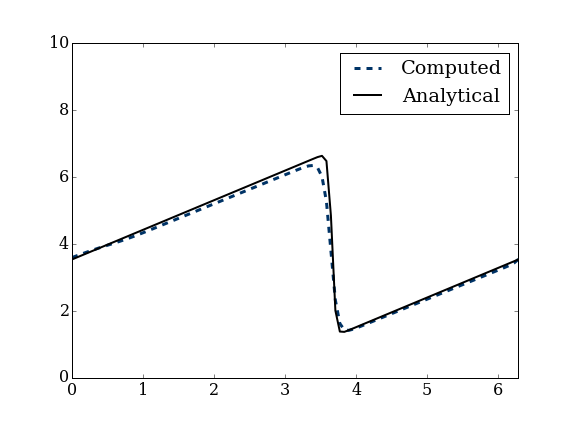
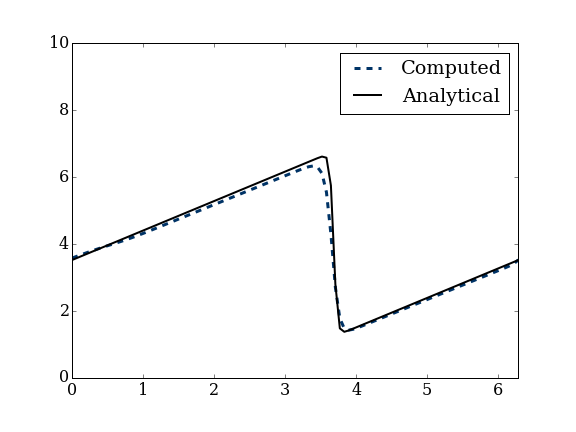
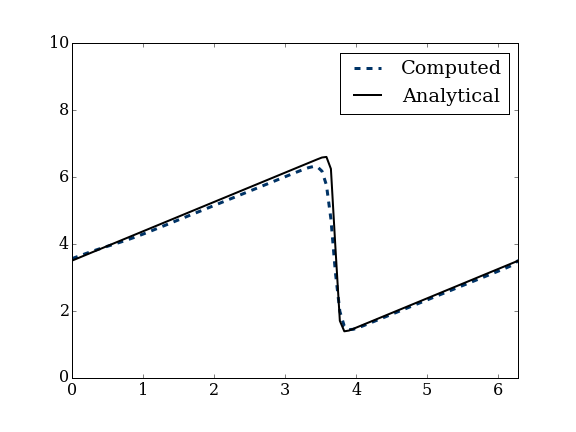
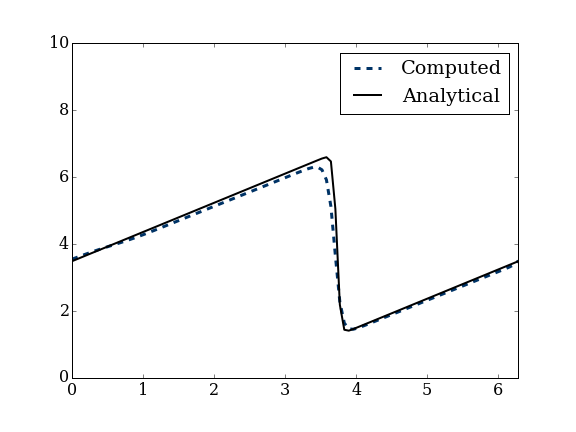
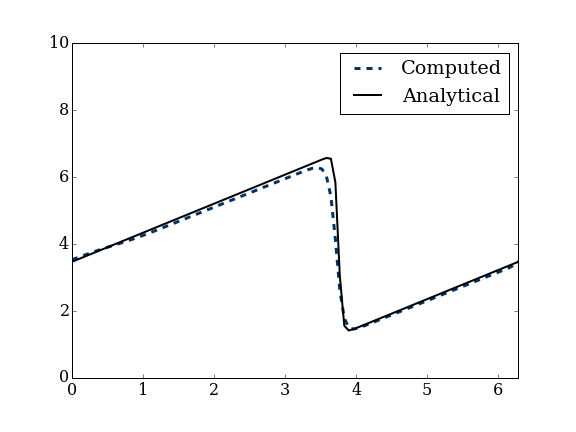
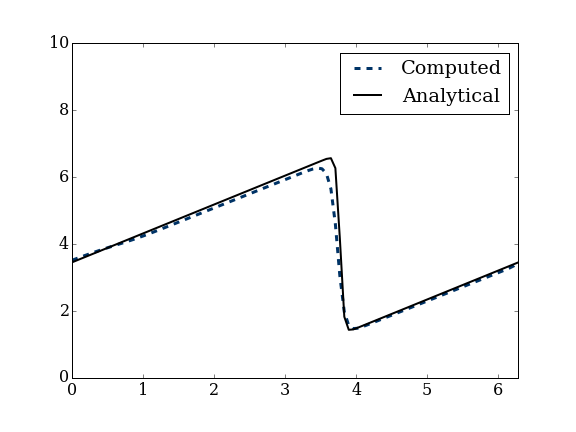
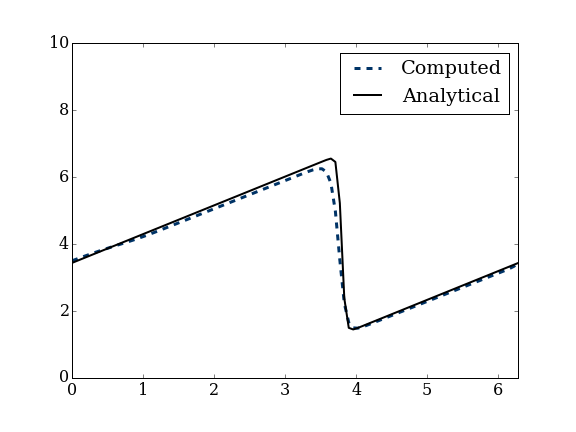
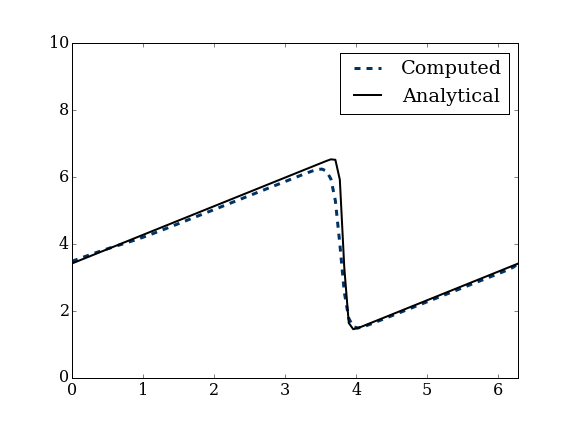
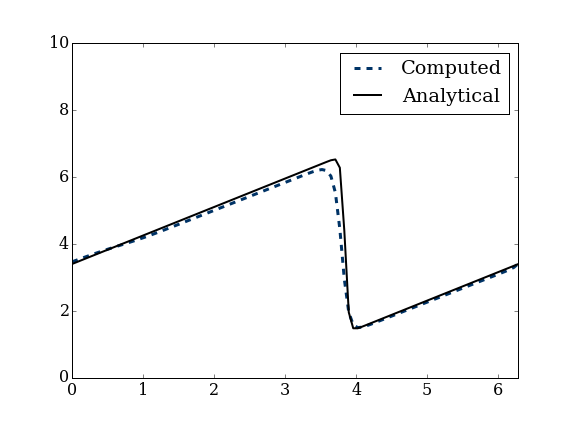
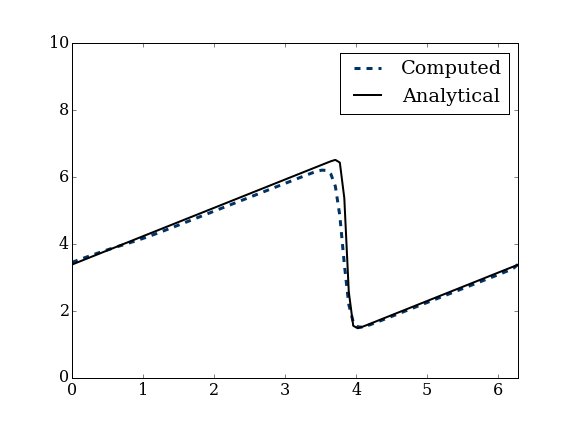
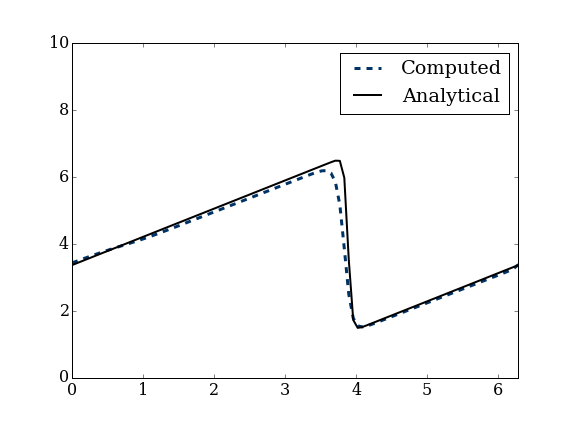
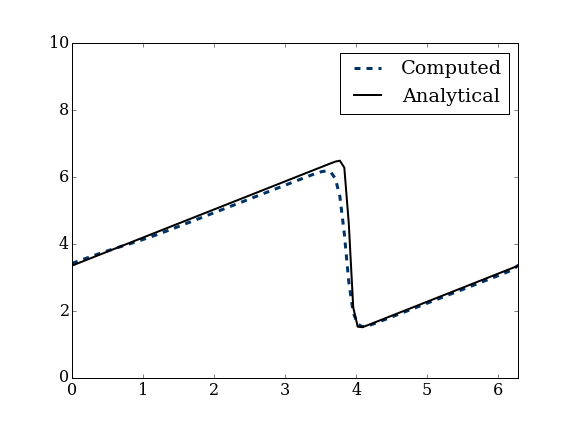
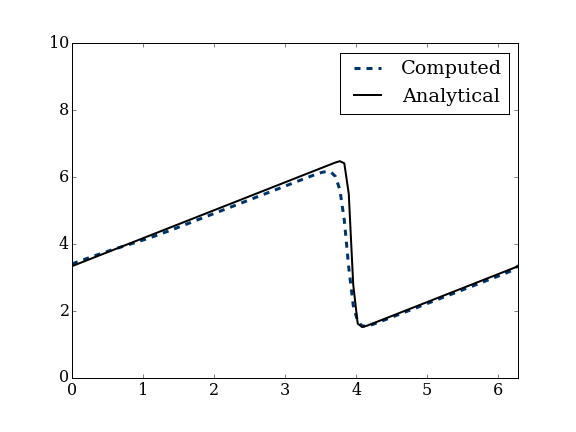
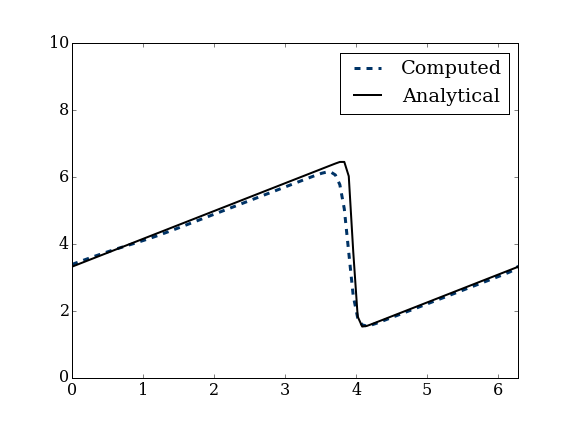
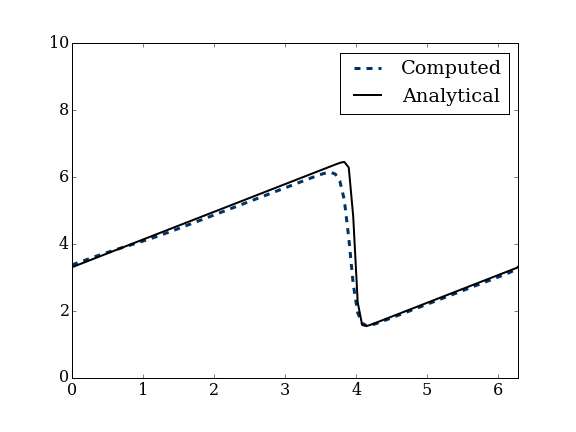
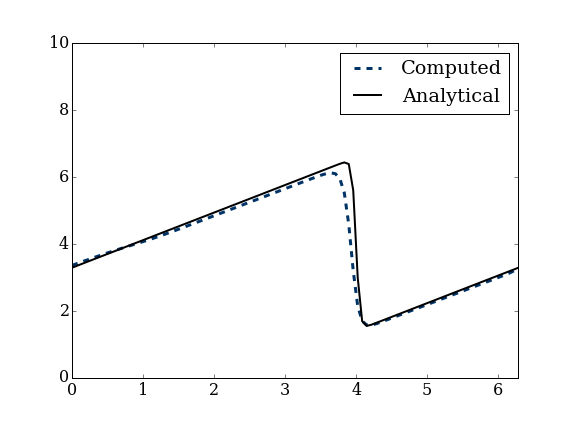
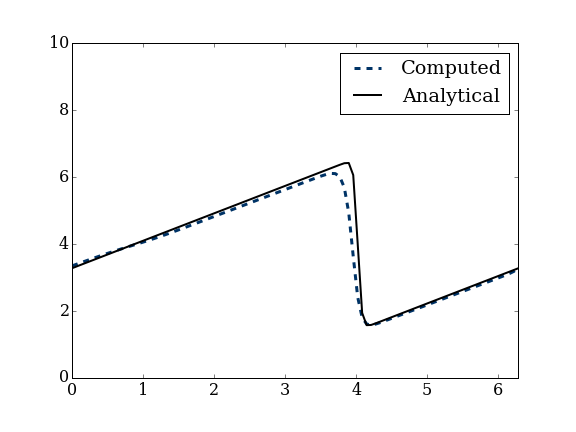
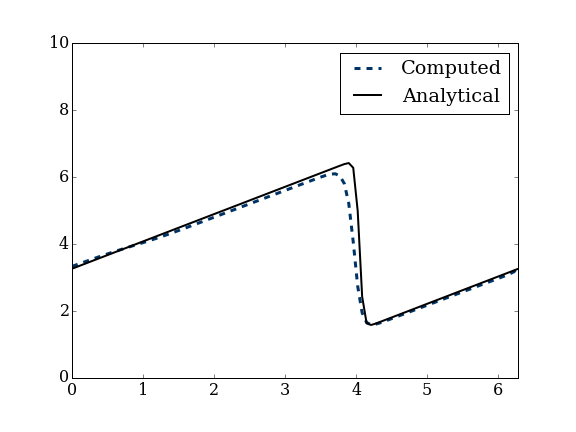
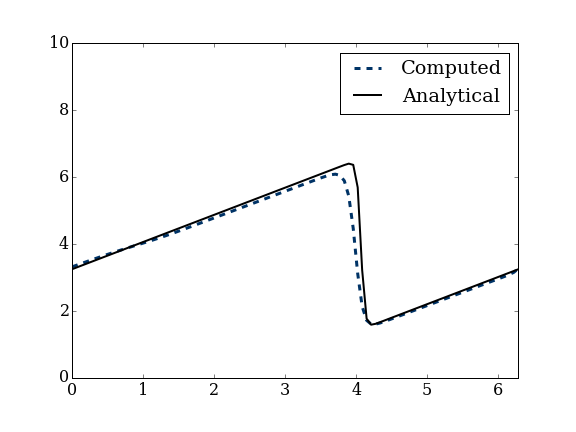
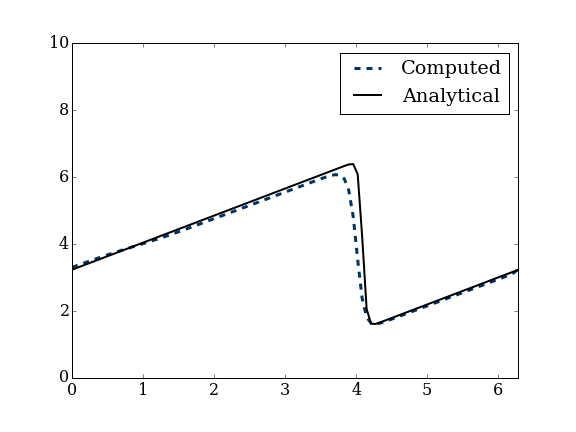
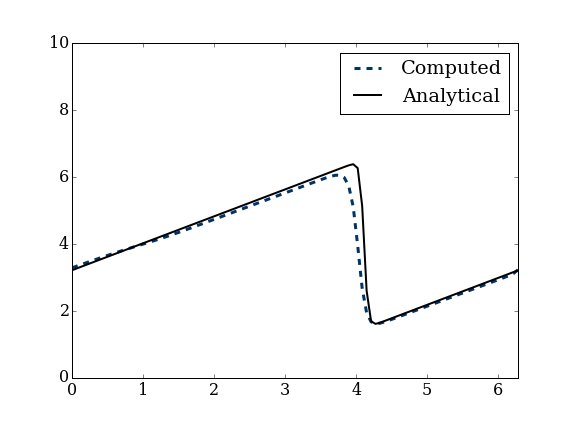
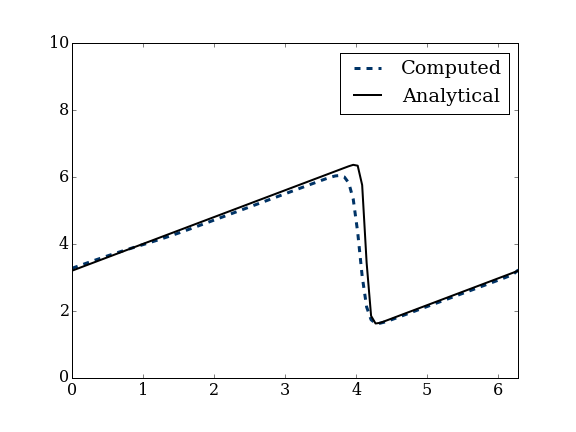
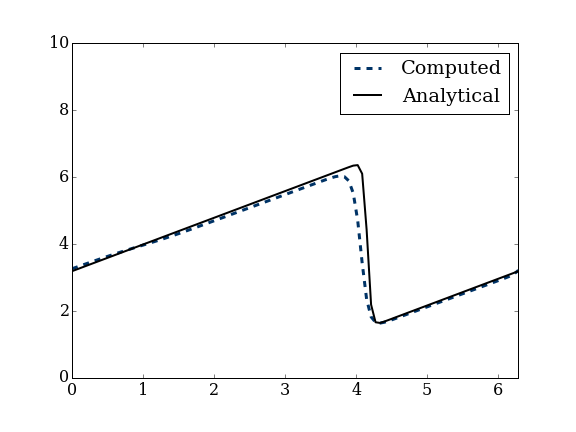
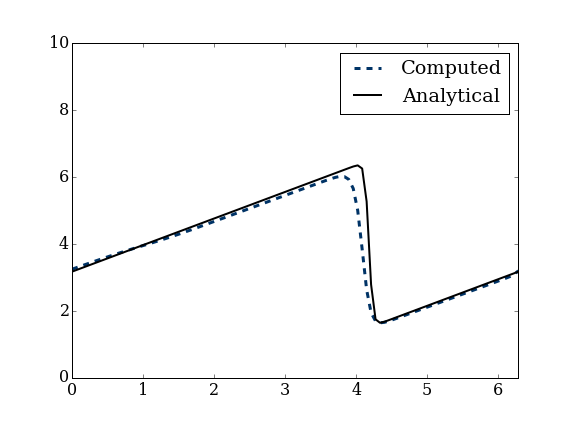
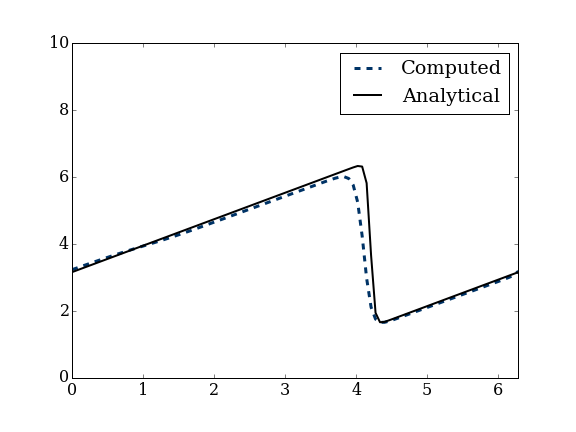
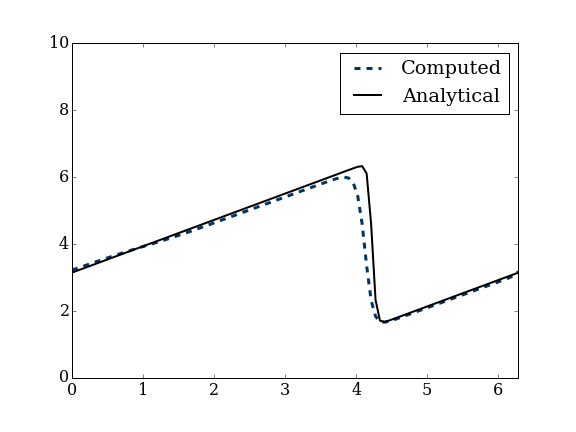
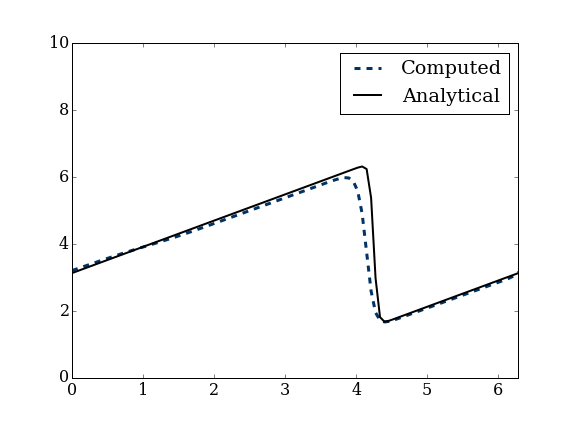
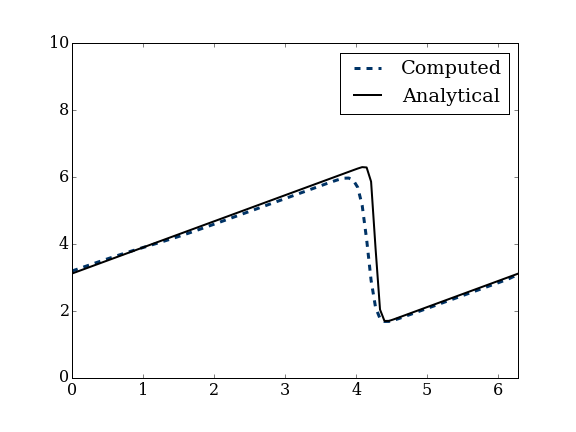
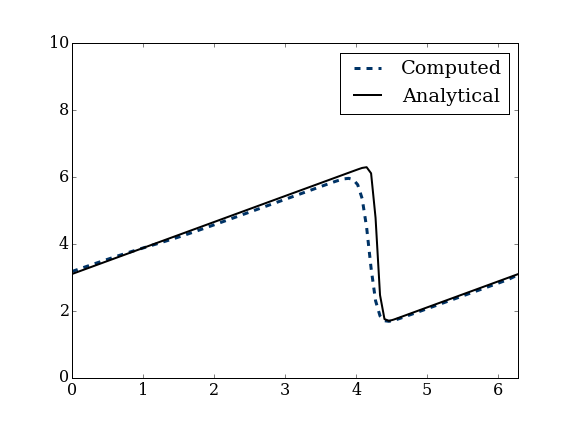
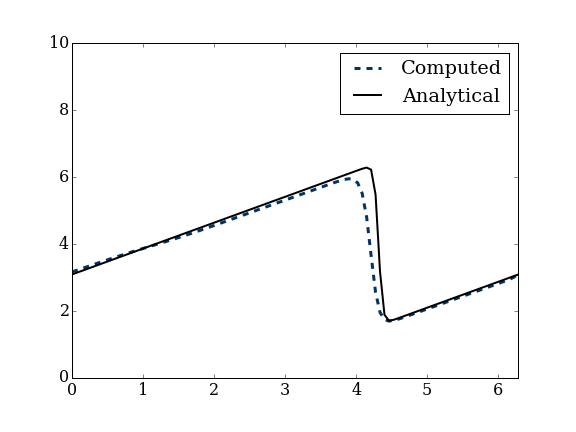
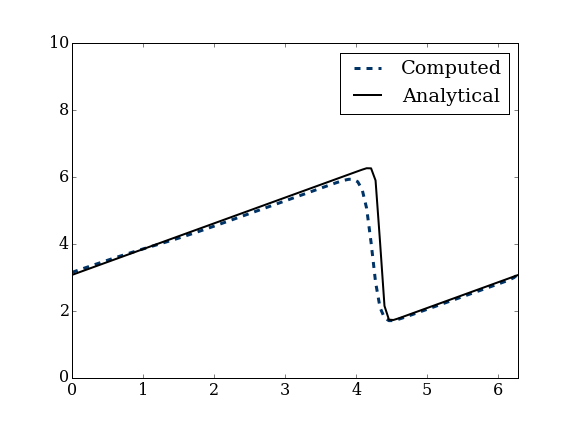
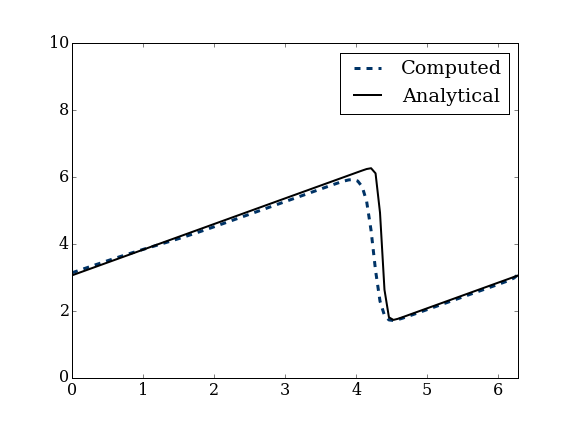
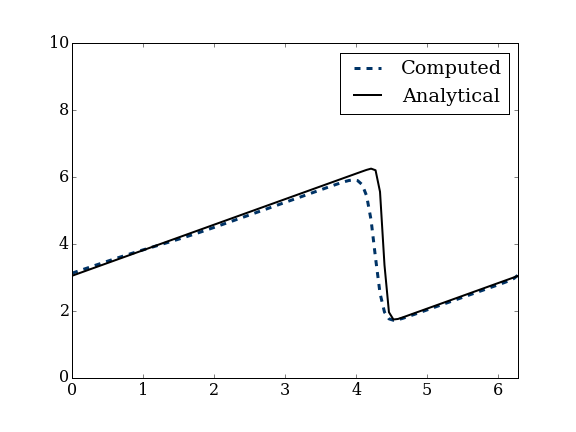
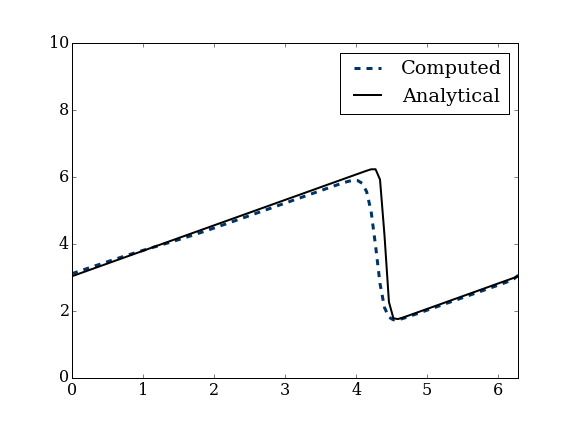
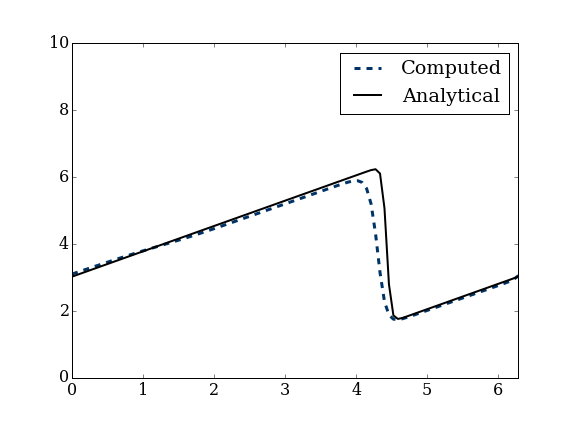
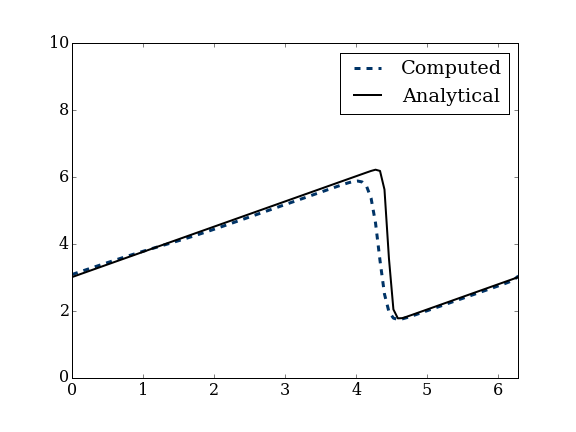
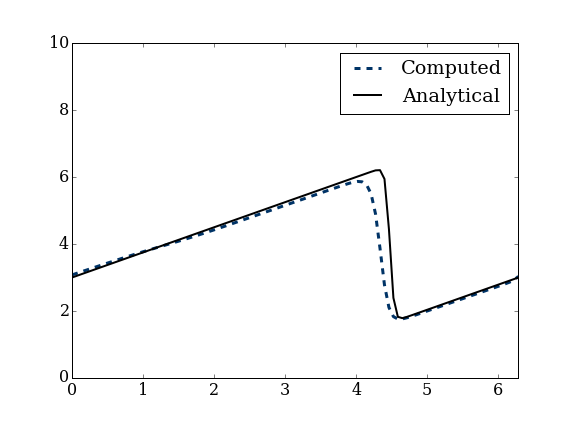
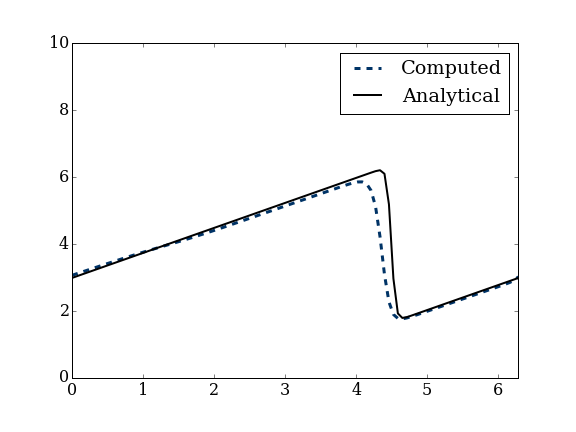
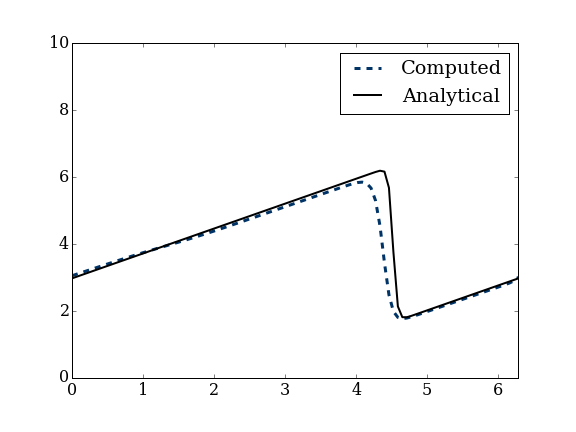
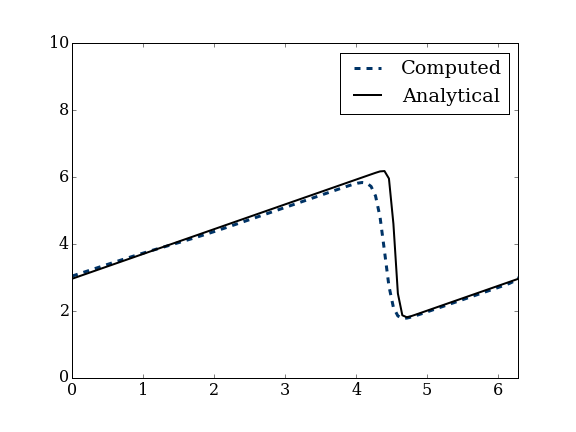
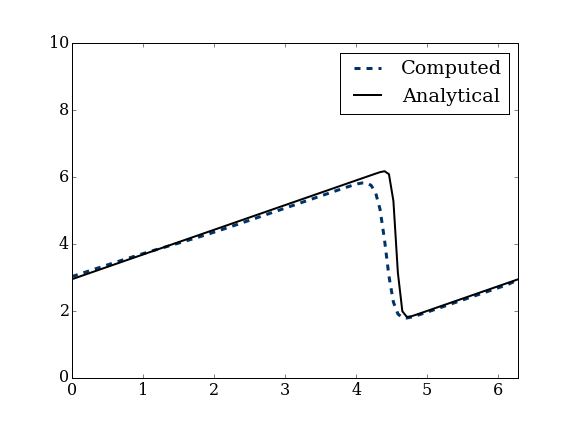
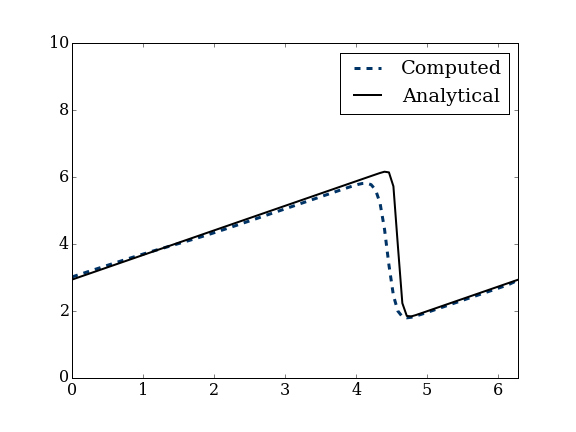
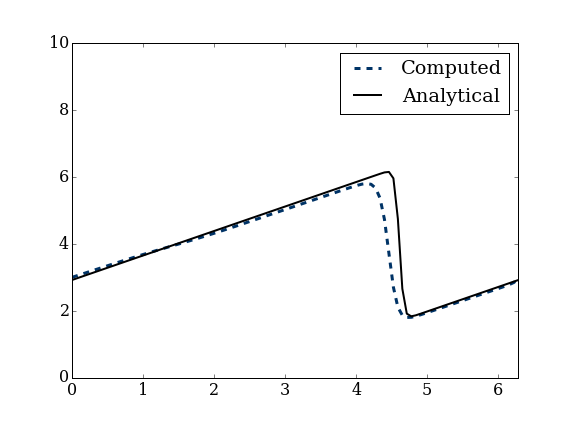
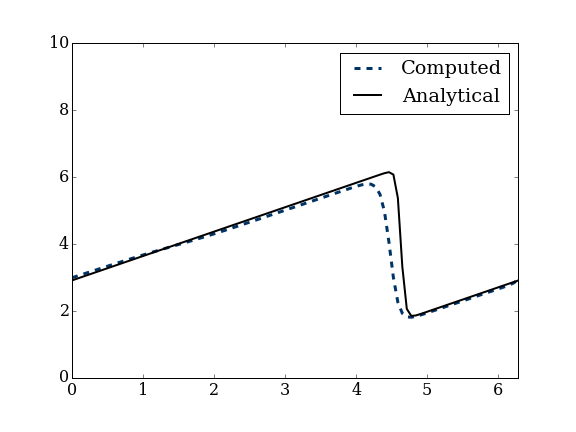
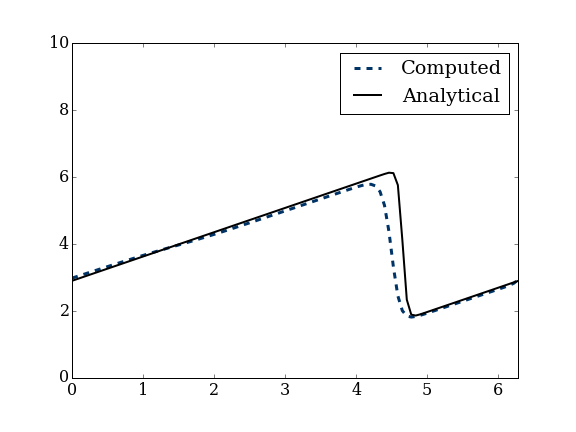
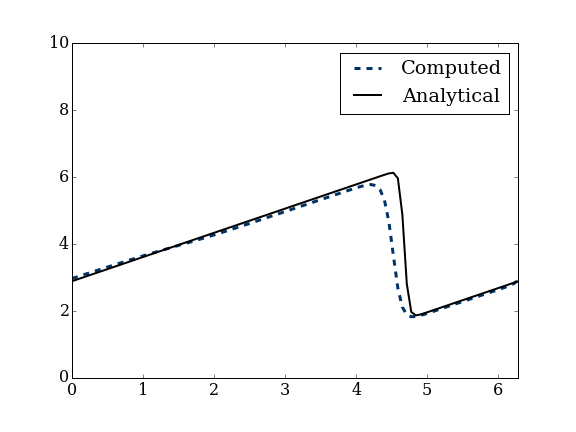
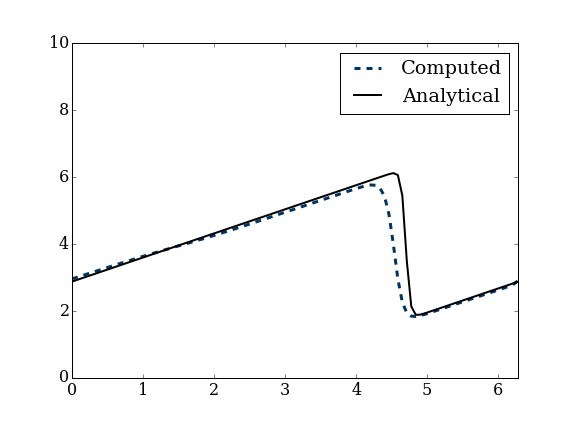
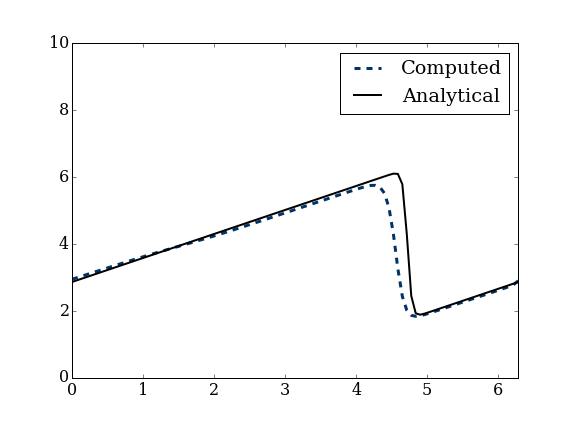
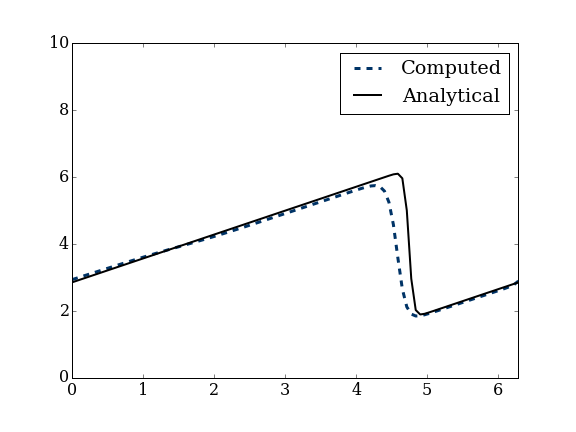
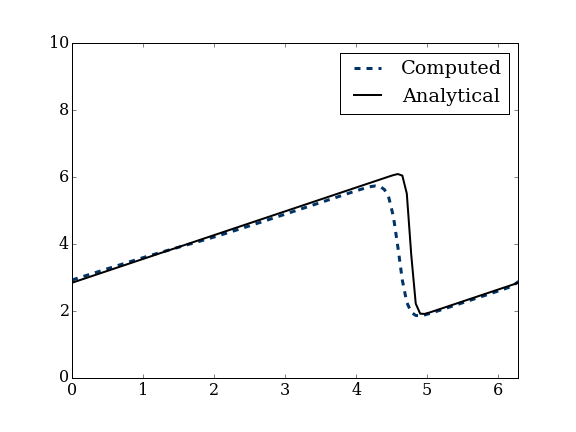
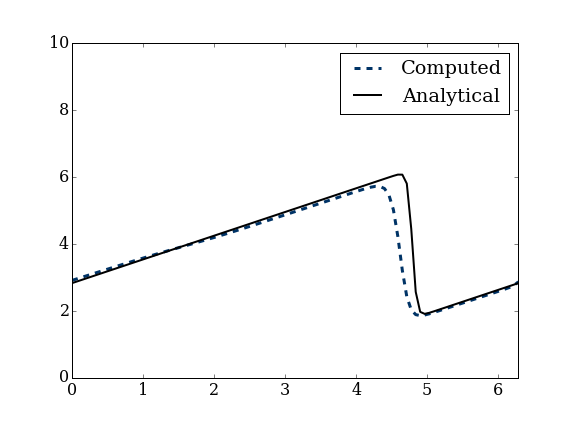
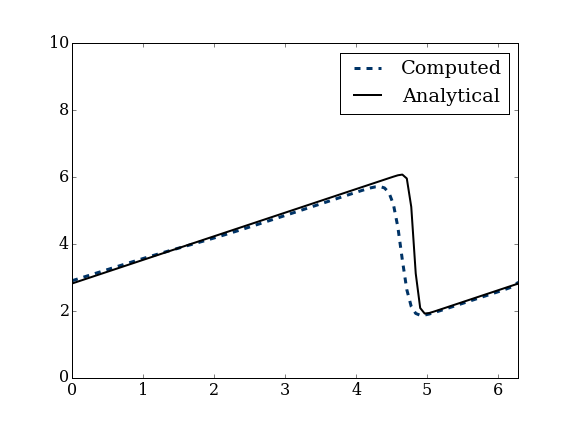
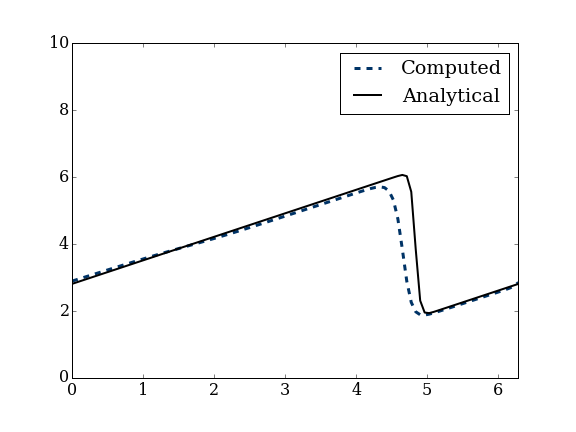
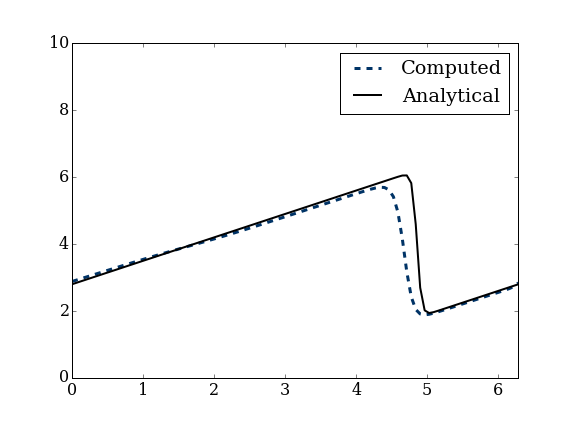
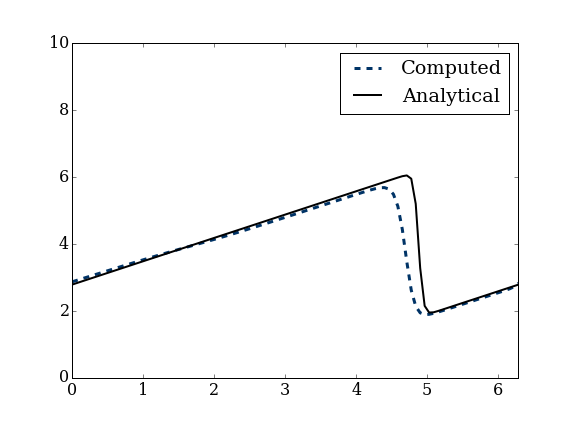
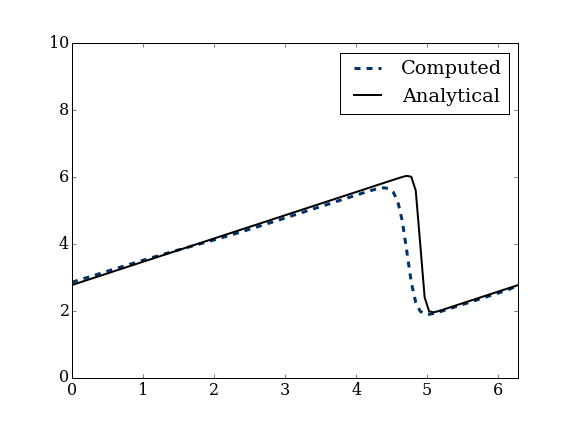
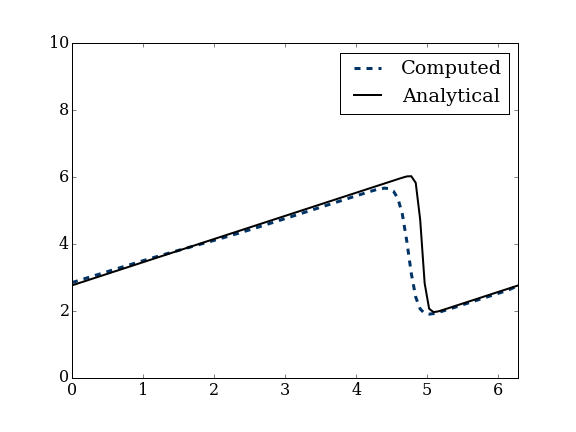
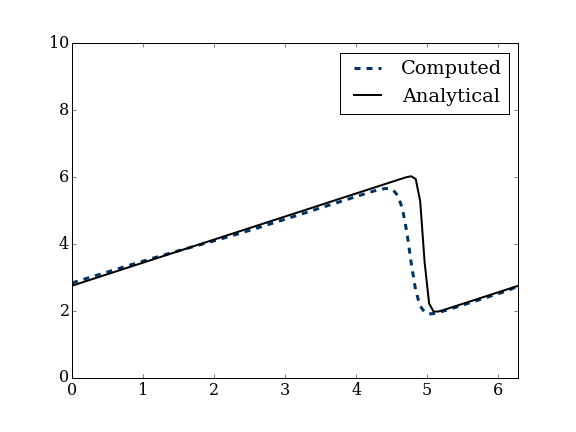
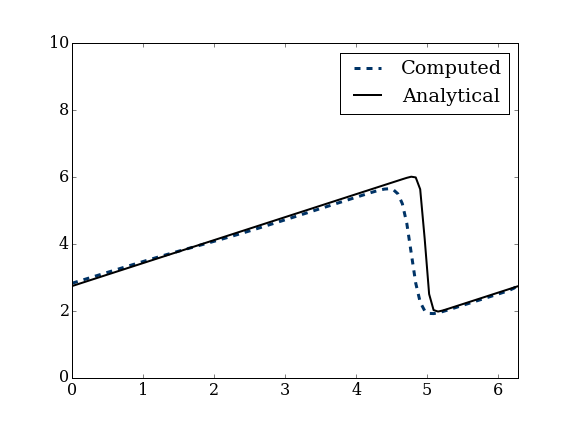
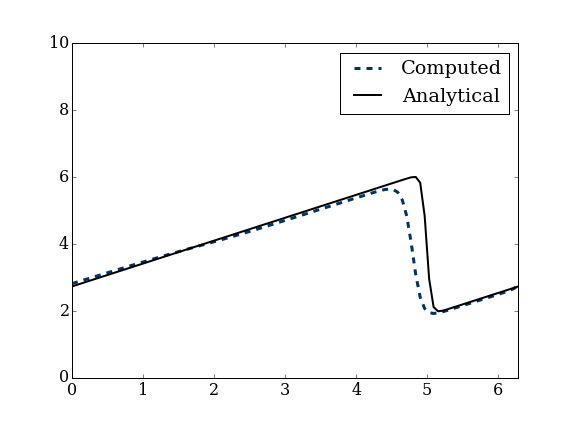
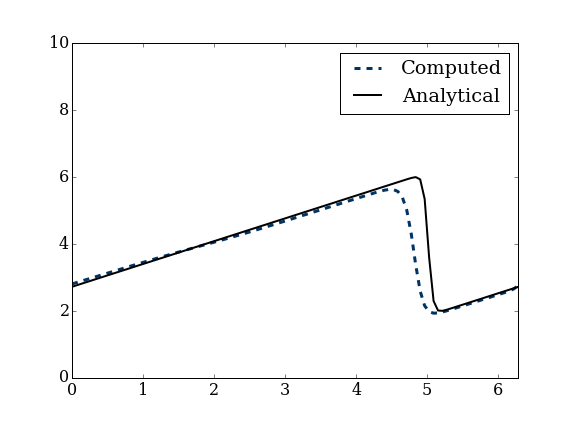
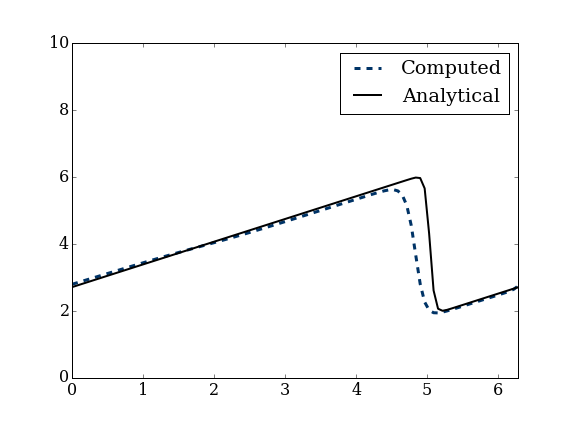
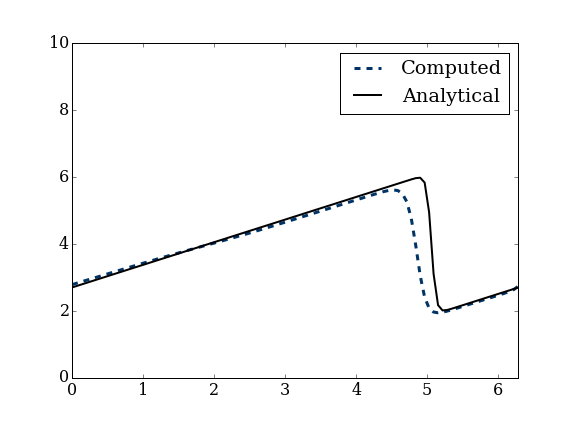
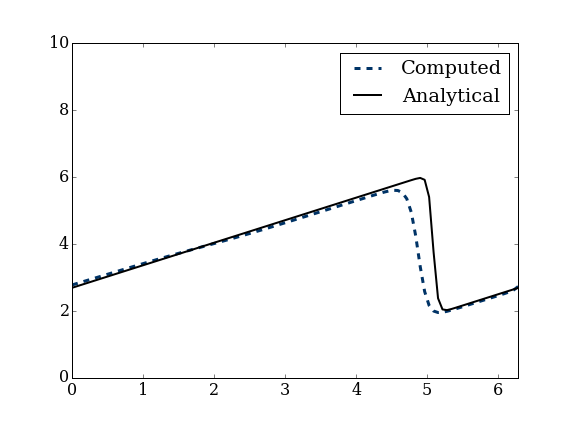
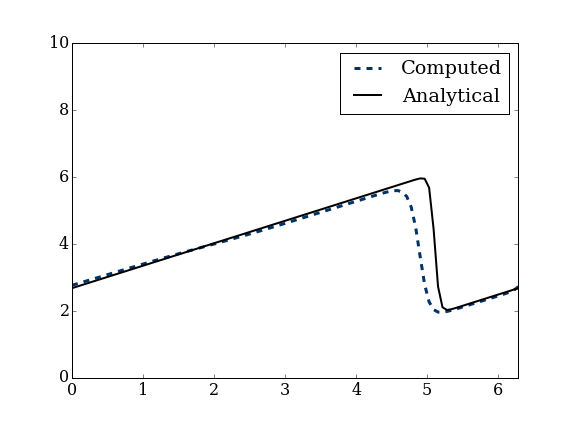
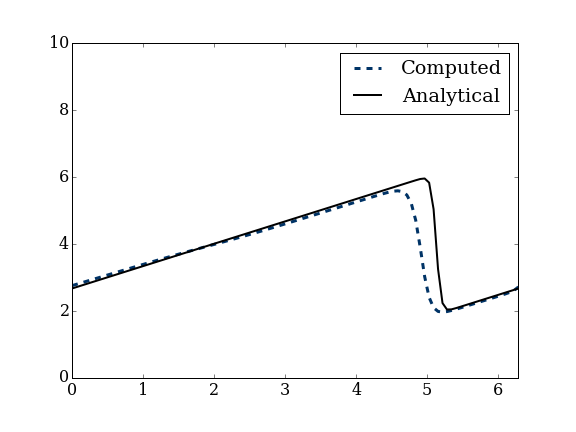
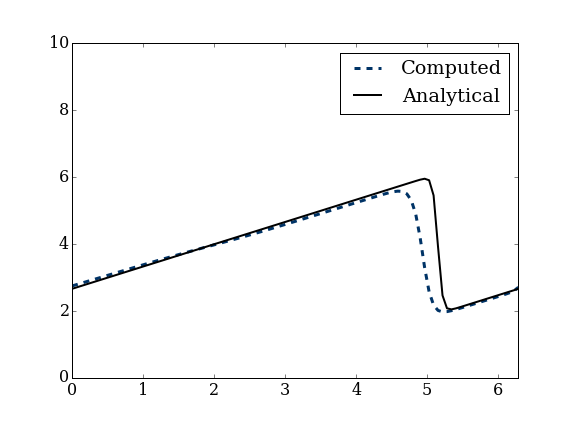
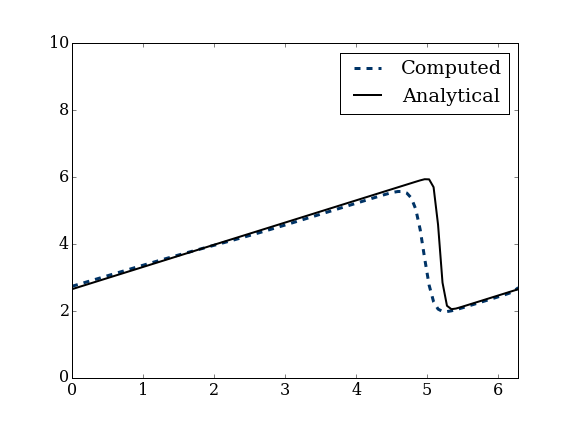
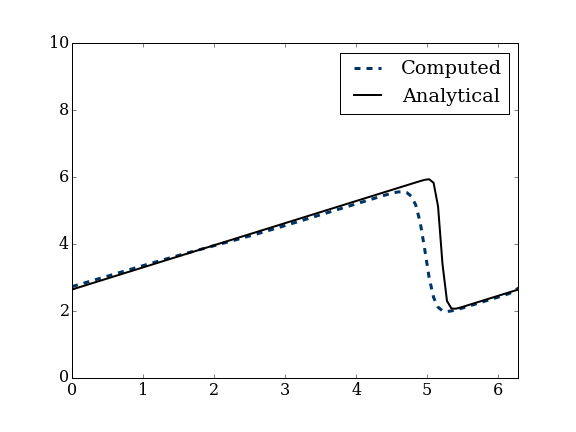
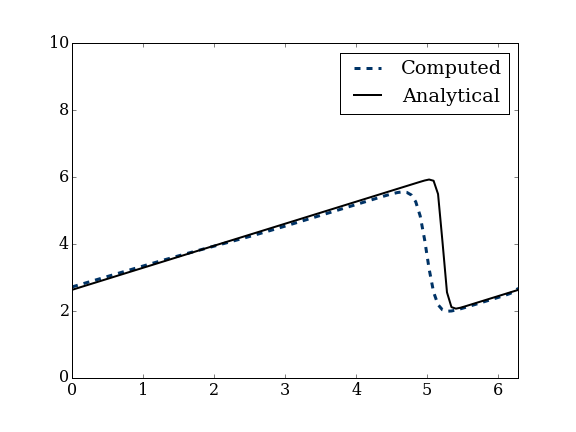
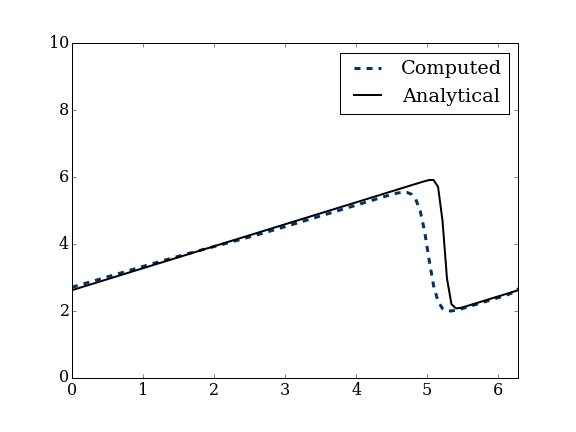
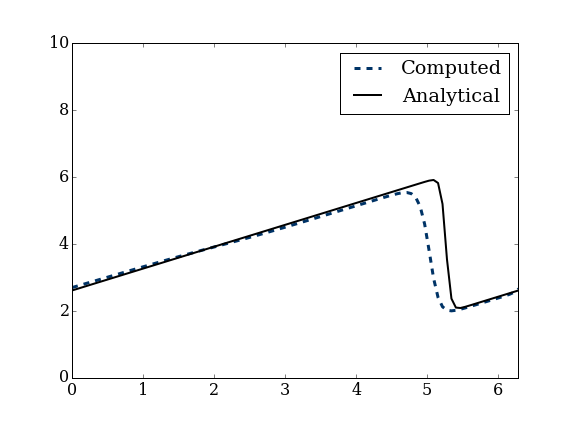
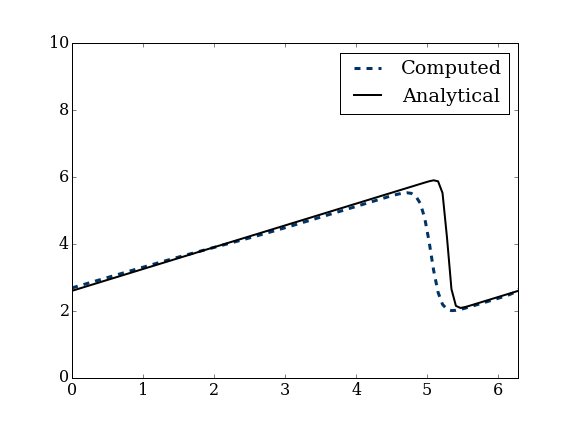
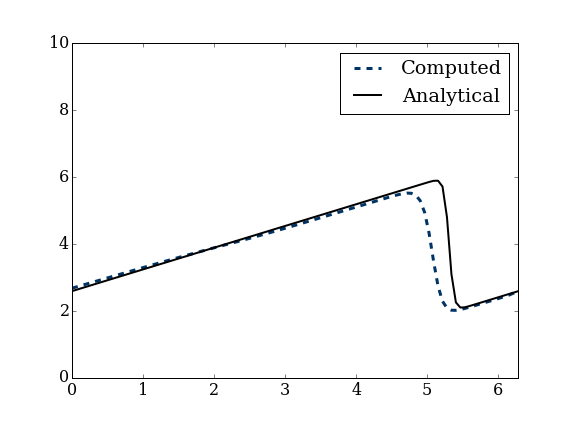
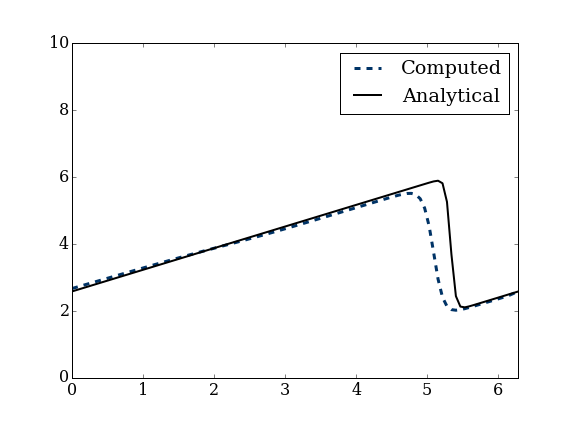
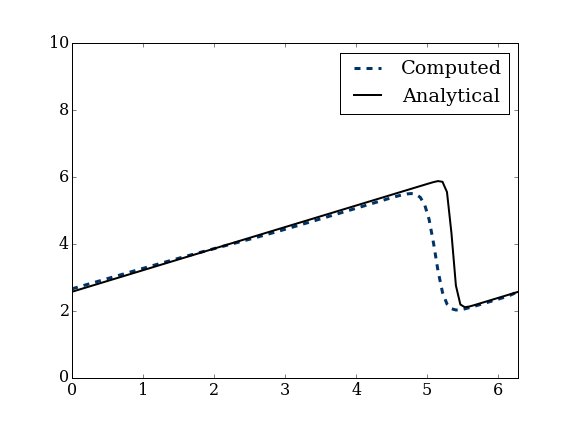
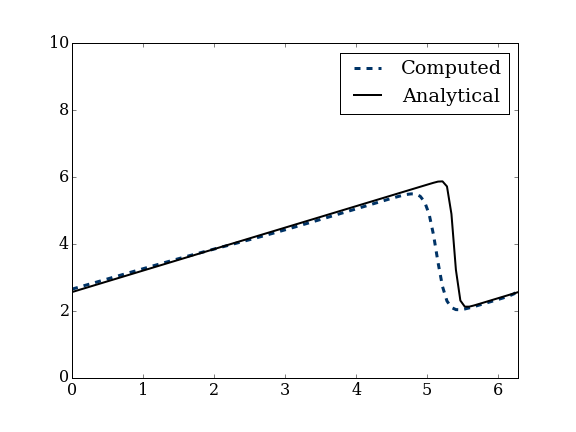

In [29]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(xlim=(0,2*np.pi), ylim=(0,10))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Computed', 'Analytical'])

def burgers(n):
    
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
            (un[2:] - 2*un[1:-1] + un[:-2])
        
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
            (un[1] - 2*un[0] + un[-1])
        
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
            (un[0] - 2*un[-1] + un[2])
        
    u_analytical = np.asarray([u_lamb(n*dt, xi, nu) for xi in x])
    line.set_data(x,u)
    line2.set_data(x, u_analytical)
    
animation.FuncAnimation(fig, burgers,
                       frames=nt, interval=100)

## Array Operation Speed Increase

In [30]:
%%timeit

u = np.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    for i in range(nx-1):
        u[i] = un[i] - un[i] * dt/dx * (un[i] - un[i-1]) + nu*dt/dx**2*\
                                       (un[i+1]-2*un[i]+un[i-1])
        
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
            (un[0]- 2*un[-1] + un[-2])

10 loops, best of 3: 112 ms per loop


In [31]:
%%timeit

u = np.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                                    (un[2:] - 2*un[1:-1] + un[:-2])
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                        (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
            (un[0] - 2*un[-1] + un[-2])

100 loops, best of 3: 13.9 ms per loop
